# How machine learning can predict the survival rates of patients with heart failure through medical statistics

#### Brian Rabino | Yanbo He

## Goal of Project
To explore the effects of different variables on heart failure.

## Data Retrieval

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

heart_filename = "heartfailure.csv"
heart = pd.read_csv(heart_filename, sep=',', decimal='.', header=0)

## Data Preparation and Pre-Processing
We must first check each attribute and determine whether the data is readily available for exploration. If not, we must first prepare the data for exploration through variable means.

In [2]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
age = heart['age']
anaemia = heart['anaemia']
crea_phos = heart['creatinine_phosphokinase']
diabetes = heart['diabetes']
ejec_frac = heart['ejection_fraction']
hbp = heart['high_blood_pressure']
platelets = heart['platelets']
ser_crea = heart['serum_creatinine']
ser_sodi = heart['serum_sodium']
sex = heart['sex']
smoking = heart['smoking']
time = heart['time']
death_event = heart['DEATH_EVENT']

Checking the data types of the dataframe so we understand what kind of values we are working with.

In [4]:
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

We check the value counts of each attribute to make sure there are no 'weird' values in the data and to ensure the data types we are working with are correct.

In [5]:
age.value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

In [6]:
anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [7]:
crea_phos.value_counts()

582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [8]:
diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [9]:
ejec_frac.value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

In [10]:
hbp.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [11]:
platelets.value_counts()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
             ..
330000.00     1
217000.00     1
268000.00     1
358000.00     1
448000.00     1
Name: platelets, Length: 176, dtype: int64

In [12]:
ser_crea.value_counts()

1.00    50
0.90    32
1.10    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
1.50     5
2.10     5
1.80     4
0.60     4
2.30     3
2.70     3
2.50     3
3.50     2
3.00     2
2.40     2
0.50     1
2.00     1
0.75     1
9.00     1
4.00     1
5.00     1
3.20     1
3.70     1
2.90     1
9.40     1
2.20     1
6.10     1
3.80     1
5.80     1
6.80     1
4.40     1
3.40     1
Name: serum_creatinine, dtype: int64

In [13]:
ser_sodi.value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
143     3
127     3
128     2
129     2
116     1
124     1
121     1
148     1
125     1
126     1
146     1
113     1
Name: serum_sodium, dtype: int64

In [14]:
sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [15]:
smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [16]:
time.value_counts()

187    7
250    7
186    6
107    6
10     6
      ..
135    1
140    1
148    1
150    1
4      1
Name: time, Length: 148, dtype: int64

In [17]:
death_event.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

We are working with non-string values, thus we do not need to check for whitespace errors or capital mismatches.

Sanity checks are not needed as the attributes that we can check (without being medically trained) could be age, and the value counts of age show no signs of impossible values.

Outliers will be dealt with in the Data Exploration section so we do not need to further process the data.

However, there may be missing values in the data that we must at least check for.

In [18]:
heart_notnull = pd.notnull(heart)
heart[heart_notnull]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


The above code uses heart_null as a mask to check whether any values in the heart dataframe is NOT null. As shown, there are no null values, so we are safe to proceed with the data. Even though the dataset source implies there are no null values, it is better to be safe and check ourselves.

Lastly, as no modifications have been made to the csv file thus far, we are safe to check for any bad lines in the dataset. If any lines have been removed, the shape of the dataset would have changed after re-assigning the heart dataframe.

In [19]:
heart.shape #Before error_bad_lines

(299, 13)

In [20]:
heart = pd.read_csv(heart_filename, sep=',', decimal='.', header=0, error_bad_lines=False)
heart.shape #After error_bad_lines

(299, 13)

## Data Exploration

### Exploring the attributes

Now that the data is processed and ready for exploration, we begin by visualizing and analyzing the attributes within the dataset. This gives us a general gist and an idea of what to look for. We must first determine what attributes produce relevant data for our original goal in the modelling section later on, and we begin by producing a variety of simple graphs to help us achieve this.

In [21]:
heart['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

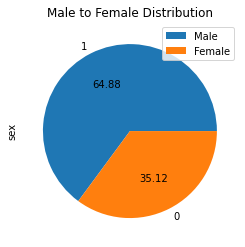

In [22]:
heart['sex'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Male to Female Distribution')
L = plt.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')
plt.show()

Figure 1. Basic pie chart of man (1) to woman (0) distribution.

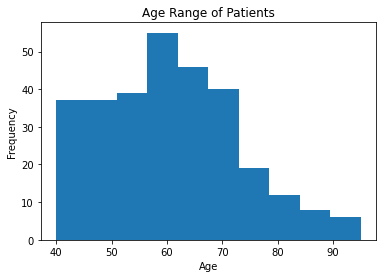

In [23]:
heart['age'].plot(kind='hist', bins=10)
plt.title('Age Range of Patients')
plt.xlabel('Age')
plt.show()

Figure 2. Histogram chart depicting ages of patients within the dataset.

It is now time to analyze the more medically related attributes, which will create a clearer depiction on the patients in the dataset.

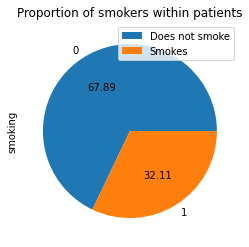

In [24]:
heart['smoking'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Proportion of smokers within patients')
L = plt.legend()
L.get_texts()[0].set_text('Does not smoke')
L.get_texts()[1].set_text('Smokes')

Figure 3. Pie chart of patients who did (1) and did not (0) smoke.

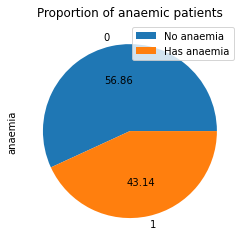

In [25]:
heart['anaemia'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Proportion of anaemic patients')
L = plt.legend()
L.get_texts()[0].set_text('No anaemia')
L.get_texts()[1].set_text('Has anaemia')

Figure 4. Pie chart of patients who have (1) and don't have (0) anaemia.

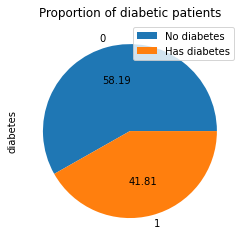

In [26]:
heart['diabetes'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Proportion of diabetic patients')
L = plt.legend()
L.get_texts()[0].set_text('No diabetes')
L.get_texts()[1].set_text('Has diabetes')

Figure 5. Pie chart of patients who do (1) and don't have (0) diabetes.

<AxesSubplot:title={'center':'Number of Patients with High Blood Pressure'}>

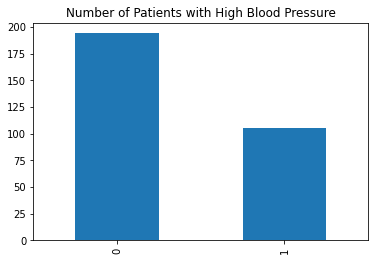

In [27]:
heart['high_blood_pressure'].value_counts().plot(kind='bar', title='Number of Patients with High Blood Pressure')

Figure 6. Number of Patients that either have (1) or don't have (0) High Blood Pressure.

<AxesSubplot:title={'center':'Death Events after Heart Failure'}>

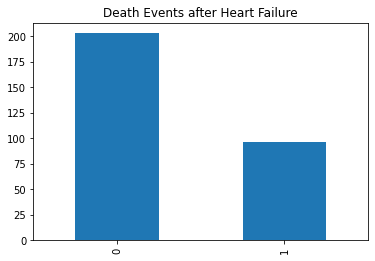

In [28]:
heart['DEATH_EVENT'].value_counts().plot(kind='bar', title='Death Events after Heart Failure')

Figure 7. The number of survivors (0) or deaths (1) after Heart Failure in the dataset

Text(0.5, 1.0, 'Levels of Serum Creatinine in patients')

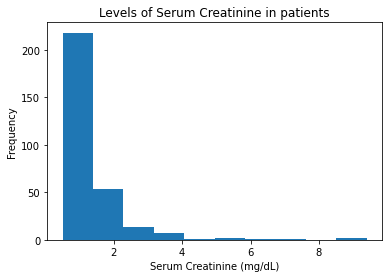

In [29]:
heart['serum_creatinine'].plot(kind='hist')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.title('Levels of Serum Creatinine in patients')

Figure 8. Level of serum creatinine in patients (mg/dL)

Text(0.5, 1.0, 'Density of Ejection Fraction by Percentage')

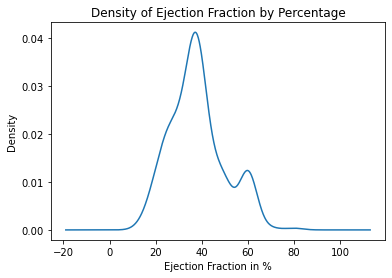

In [30]:
heart['ejection_fraction'].plot(kind='density')
plt.xlabel('Ejection Fraction in %')
plt.title('Density of Ejection Fraction by Percentage')

Figure 9. Density plot of Ejection Fraction in %.

Text(0, 0.5, 'kiloplatelets/mL')

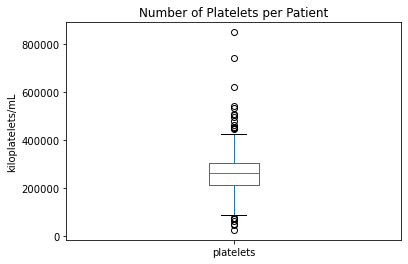

In [31]:
heart['platelets'].dropna().plot(kind='box', title= 'Number of Platelets per Patient')
plt.ylabel('kiloplatelets/mL')

Figure 10. Number of Platelets per Patient.

In [32]:
mask_deceased = heart['DEATH_EVENT'] == 1 #Selects the data only from patients with death event equal to 1
mask_survived = heart['DEATH_EVENT'] == 0
mask_deceased.value_counts()

False    203
True      96
Name: DEATH_EVENT, dtype: int64

We can now explore how different attributes affect the number of survived patients.

In [33]:
deceased_vs_age = heart.loc[mask_deceased, 'age']
survived_vs_age = heart.loc[mask_survived, 'age']

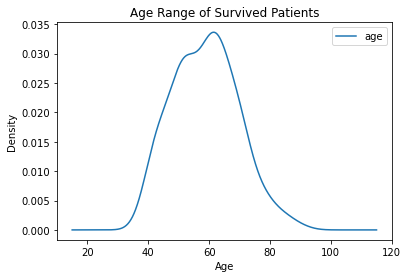

In [34]:
survived_vs_age.plot(kind='density')
plt.title('Age Range of Survived Patients')
plt.xlabel('Age')
plt.legend()

Figure 11. Density Plot of Survived Patients.

Text(0.5, 0, 'Age')

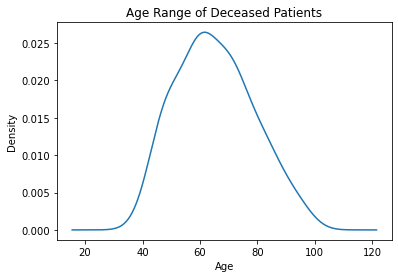

In [35]:
deceased_vs_age.plot(kind='density')
plt.title('Age Range of Deceased Patients')
plt.xlabel('Age')

Figure 12. Density Plot of Ages of Deceased Patients.

Figure 12 visualizes the frequencies of the Ages of Deceased Patients. It helps us depict how there are more frequent Heart Failures within the 60-70 bins, however this may be due to simply a higher number of Patients within these Ages.

These two figures show us that there is not much difference in the ages between the survived and deceased patients. However, patients around the ages of 80 decease more often after Heart Failure (0.015) compared to the density measurements of survival (0.005).

We can explore other attributes comparing the data of survived and deceased patients through boxplots.

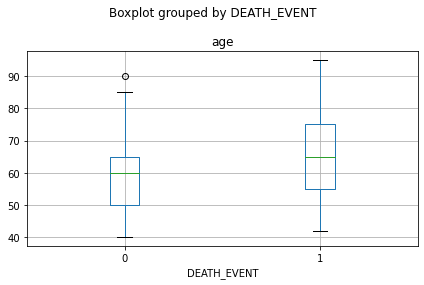

In [36]:
heart.dropna().boxplot(column='age', by = 'DEATH_EVENT')
plt.tight_layout()
plt.show()

Figure 13. Boxplot of Ages grouped by Death Events.

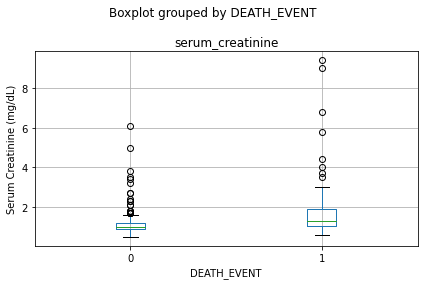

In [37]:
heart.dropna().boxplot(column='serum_creatinine', by = 'DEATH_EVENT')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.tight_layout()
plt.show()

Figure 14. Boxplot of Serum Creatinine (mg/dL) grouped by Death Events.

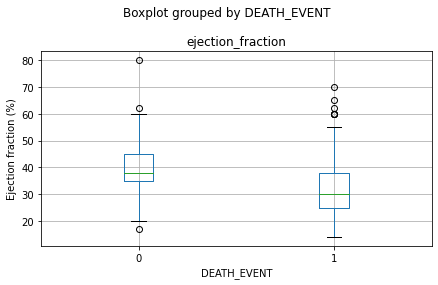

In [38]:
heart.dropna().boxplot(column='ejection_fraction', by = 'DEATH_EVENT')
plt.tight_layout()
plt.ylabel('Ejection fraction (%)')
plt.show()

Figure 15. Boxplot of Ejection Fraction (%) grouped by Death Events.

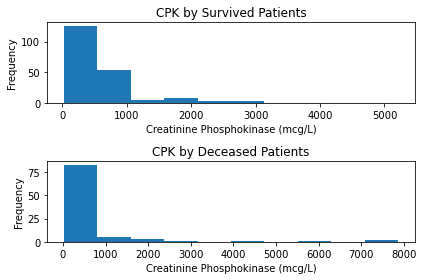

In [39]:
deceased_vs_cpk = heart.loc[mask_deceased, 'creatinine_phosphokinase']
survived_vs_cpk = heart.loc[mask_survived, 'creatinine_phosphokinase']

plt.subplot(2,1,1)
survived_vs_cpk.plot(kind='hist')
plt.xlabel('Creatinine Phosphokinase (mcg/L)')
plt.title('CPK by Survived Patients')

plt.subplot(2,1,2)
deceased_vs_cpk.plot(kind='hist')
plt.xlabel('Creatinine Phosphokinase (mcg/L)')
plt.title('CPK by Deceased Patients')

plt.tight_layout()
plt.show()

Figure 16. Histograms of 'CPK' Creatinine Phosphokinase (mcg/L) by Death Events.

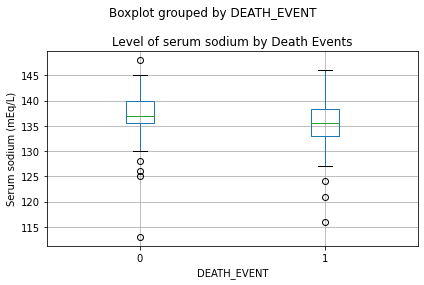

In [40]:
heart.dropna().boxplot(column='serum_sodium', by = 'DEATH_EVENT')
plt.ylabel('Serum sodium (mEq/L)')
plt.title('Level of serum sodium by Death Events')
plt.tight_layout()
plt.show()

Figure 17. Boxplot of Serium Sodium levels (mEq/L) by Death Events.

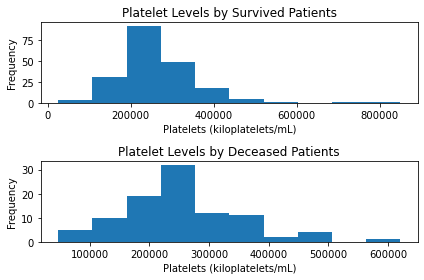

In [41]:
survived_vs_platelets = heart.loc[mask_survived, 'platelets']
deceased_vs_platelets = heart.loc[mask_deceased, 'platelets']


plt.subplot(2,1,1)
survived_vs_platelets.plot(kind='hist')
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.title('Platelet Levels by Survived Patients')

plt.subplot(2,1,2)
deceased_vs_platelets.plot(kind='hist')
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.title('Platelet Levels by Deceased Patients')

plt.tight_layout()
plt.show()

Figure 18. Histograms of Platelet Levels (kiloplatelets/mL) by Death Events.

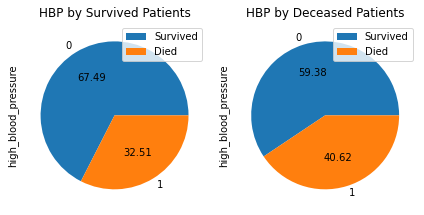

In [42]:
deceased_vs_hbp = heart.loc[mask_deceased, 'high_blood_pressure']
survived_vs_hbp = heart.loc[mask_survived, 'high_blood_pressure']

plt.subplot(1,2,1)
survived_vs_hbp.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('HBP by Survived Patients')
L = plt.legend()
L.get_texts()[0].set_text('Survived')
L.get_texts()[1].set_text('Died')

plt.subplot(1,2,2)
deceased_vs_hbp.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('HBP by Deceased Patients')
L = plt.legend()
L.get_texts()[0].set_text('Survived')
L.get_texts()[1].set_text('Died')

plt.tight_layout()
plt.show()

Figure 19. Pie charts of Percentage of Patients with (1) or without (0) High Blood Pressure

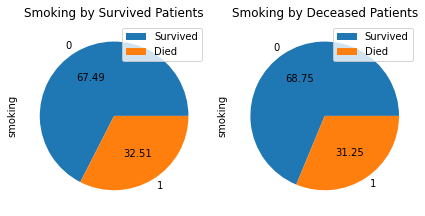

In [43]:
deceased_vs_smoking = heart.loc[mask_deceased, 'smoking']
survived_vs_smoking = heart.loc[mask_survived, 'smoking']

plt.subplot(1,2,1)
survived_vs_smoking.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Smoking by Survived Patients')
L = plt.legend()
L.get_texts()[0].set_text('Survived')
L.get_texts()[1].set_text('Died')

plt.subplot(1,2,2)
deceased_vs_smoking.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Smoking by Deceased Patients')
L = plt.legend()
L.get_texts()[0].set_text('Survived')
L.get_texts()[1].set_text('Died')

plt.tight_layout()
plt.show()

Figure 20. Number of Patients who did (1) or did not (0) smoke

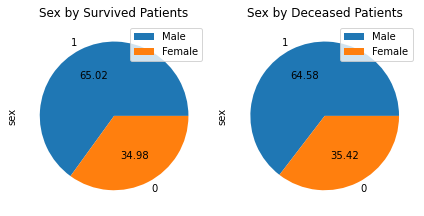

In [44]:
deceased_vs_sex = heart.loc[mask_deceased, 'sex']
survived_vs_sex = heart.loc[mask_survived, 'sex']

plt.subplot(1,2,1)
survived_vs_sex.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Sex by Survived Patients')
L = plt.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

plt.subplot(1,2,2)
deceased_vs_sex.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Sex by Deceased Patients')
L = plt.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

plt.tight_layout()
plt.show()

Figure 21. Sex of patients where Male (1) and Female (0)

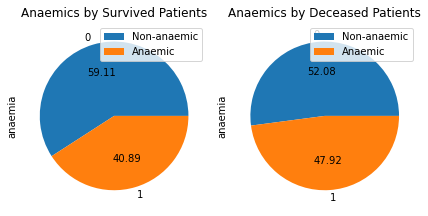

In [45]:
deceased_vs_anaemia = heart.loc[mask_deceased, 'anaemia']
survived_vs_anaemia = heart.loc[mask_survived, 'anaemia']

plt.subplot(1,2,1)
survived_vs_anaemia.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Anaemics by Survived Patients')
L = plt.legend()
L.get_texts()[1].set_text('Anaemic')
L.get_texts()[0].set_text('Non-anaemic')

plt.subplot(1,2,2)
deceased_vs_anaemia.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Anaemics by Deceased Patients')
L = plt.legend()
L.get_texts()[1].set_text('Anaemic')
L.get_texts()[0].set_text('Non-anaemic')

plt.tight_layout()
plt.show()

Figure 22. Survived and Deceased Patients by Anaemic (1) or Non-Anaemic (0)

## Data Modelling

### Decision Tree Classification

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [47]:
X = heart.values[:, 0:12]
Y = heart.values[:, 12]

In [48]:
from sklearn.utils import shuffle
col_num=X.shape[1]
new_Ind=[]
cur_MaxScore=0.0
col_Ind_Random=shuffle(range(0, col_num), random_state=1)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, Y, test_size=0.25, random_state=100)
    clf = DecisionTreeClassifier(criterion = "entropy", 
                                    max_depth=5,
                                    random_state = 101,
                                    min_samples_split=12,
                                    min_samples_leaf=8,
                                    max_features= "auto",
                                    max_leaf_nodes=None)
    fit=clf.fit(X_train, y_train)
    cur_Score=clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore=cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.6666666666666666
Score with 2 selected features: 0.6933333333333334
Score with 3 selected features: 0.7333333333333333
Score with 4 selected features: 0.7333333333333333
Score with 5 selected features: 0.7733333333333333
Score with 6 selected features: 0.8133333333333334
Score with 7 selected features: 0.8133333333333334
Score with 8 selected features: 0.8133333333333334


In [49]:
X = heart[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 
           'serum_sodium', 'sex']]
Y = heart['DEATH_EVENT']

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=
                                                   0.25, random_state=100)

In [51]:
clf = DecisionTreeClassifier(criterion = "entropy", 
                                    max_depth=5,
                                    random_state = 100,
                                    min_samples_split=12,
                                    min_samples_leaf=8,
                                    max_features= "auto",
                                    max_leaf_nodes=None)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.72

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        50
           1       0.64      0.36      0.46        25

    accuracy                           0.72        75
   macro avg       0.69      0.63      0.64        75
weighted avg       0.71      0.72      0.69        75



## KNeighbours Classification

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
X = heart.values[:, 0:12]
Y = heart.values[:, 12]

In [56]:
from sklearn.utils import shuffle
col_num=X.shape[1]
new_Ind=[]
cur_MaxScore=0.0
col_Ind_Random=shuffle(range(0, col_num), random_state=1)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, Y, test_size=0.25, random_state=100)
    clf=KNeighborsClassifier(n_neighbors=15, 
                          weights='distance', 
                          p=2, 
                          metric='minkowski')
    fit=clf.fit(X_train, y_train)
    cur_Score=clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore=cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        

Score with 1 selected features: 0.6
Score with 2 selected features: 0.64
Score with 3 selected features: 0.64
Score with 4 selected features: 0.64
Score with 5 selected features: 0.6666666666666666
Score with 6 selected features: 0.6666666666666666
Score with 7 selected features: 0.7333333333333333
Score with 8 selected features: 0.7333333333333333
Score with 9 selected features: 0.7333333333333333
Score with 10 selected features: 0.7333333333333333


In [57]:
X = heart[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 
           'serum_sodium', 'sex', 'smoking', 'anaemia']]
Y = heart['DEATH_EVENT']

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=
                                                   0.25, random_state=100)

In [59]:
clf = KNeighborsClassifier(n_neighbors=15, 
                          weights='distance', 
                          p=2, 
                          metric='minkowski')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6266666666666667

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        50
           1       0.41      0.28      0.33        25

    accuracy                           0.63        75
   macro avg       0.55      0.54      0.54        75
weighted avg       0.60      0.63      0.60        75

